# Advertising Dataset
### This Dataset contain the Information about the users either they clicked on Advertisement or not. Depending on the features like Daily Time spent on a site, Age, Area Income,etc.

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings(action='ignore')

## Importing the Dataset

In [2]:
df=pd.read_csv('advertising.csv')

In [29]:
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0


## Exploratory Data analysis (EDA)

> Area Income vs Age (hue=Sex)

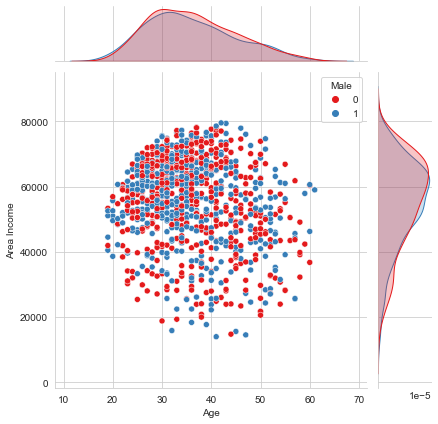

In [79]:
sns.set_style('whitegrid')
sns.jointplot(df['Age'],df['Area Income'],hue=df['Male'],palette='Set1');

> Area Income (histogram)

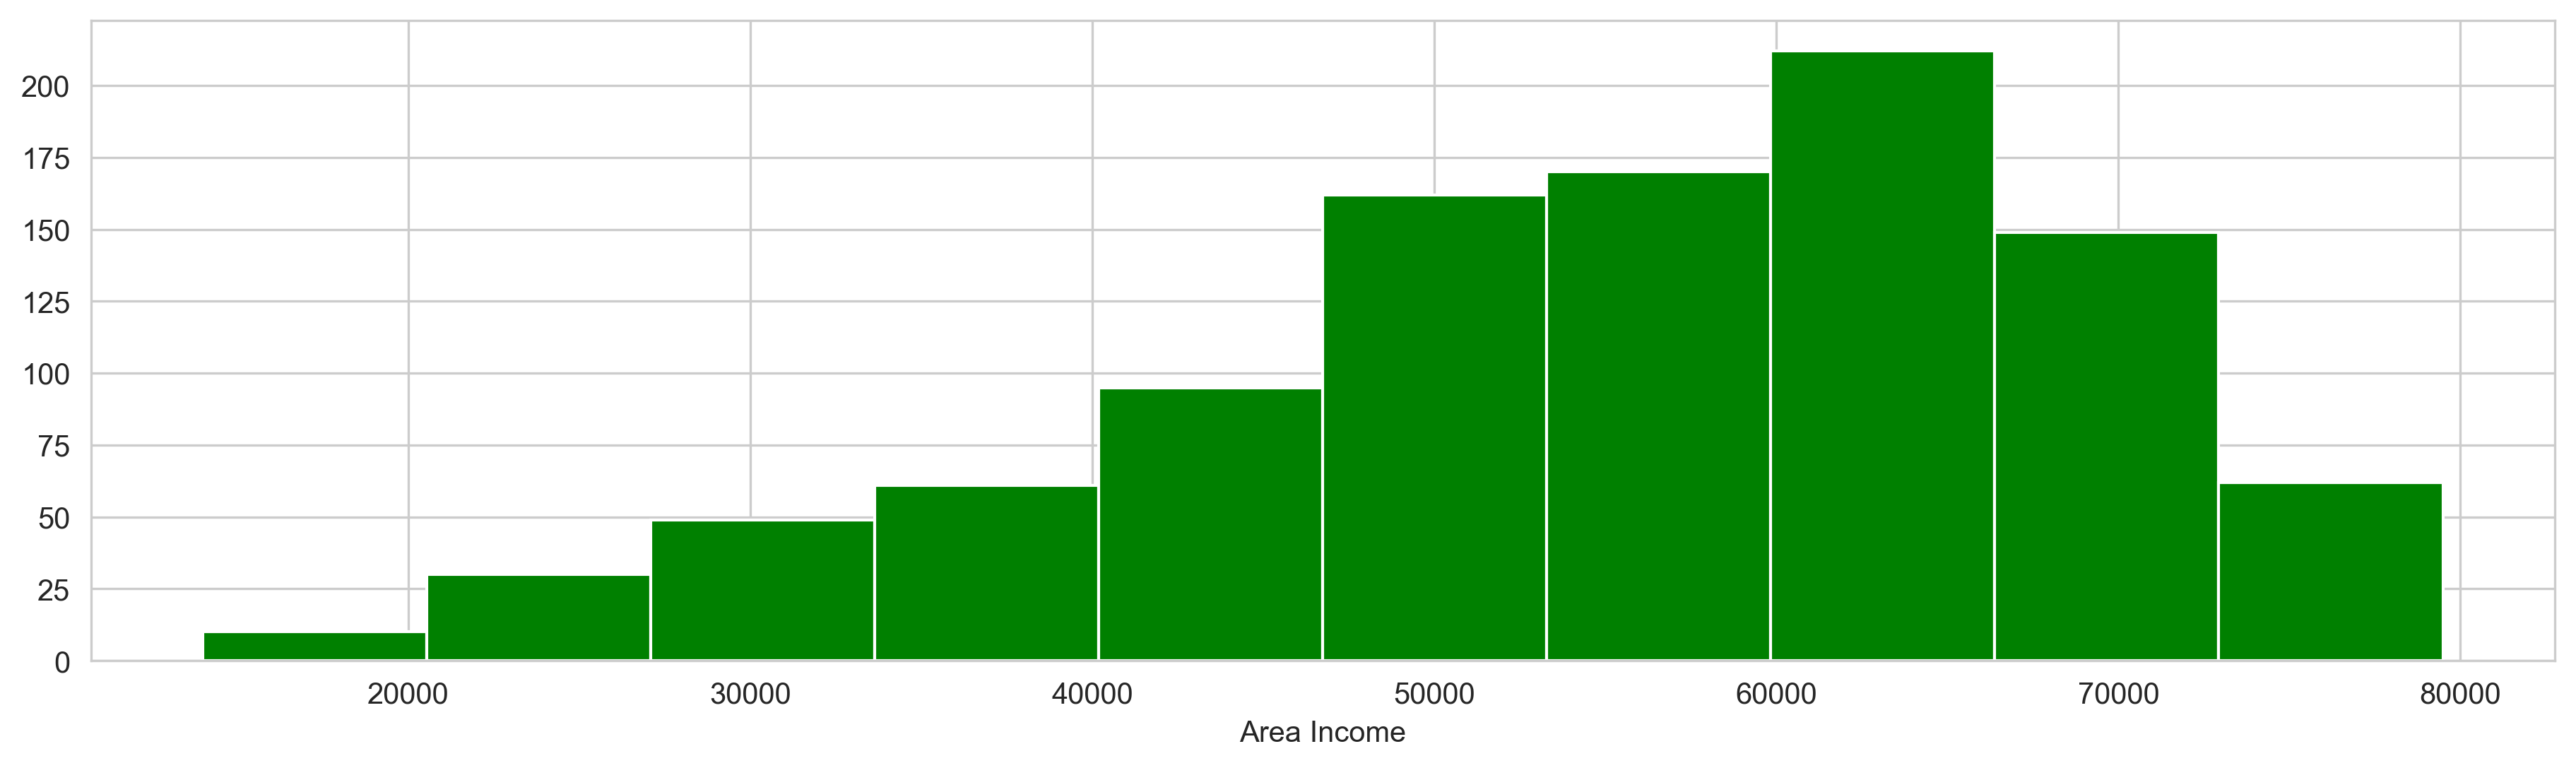

In [75]:
plt.figure(figsize=(15,4),dpi=300)
plt.hist(df['Area Income'],color='green')
plt.xlabel('Area Income');

> Pairplot (Dataset)

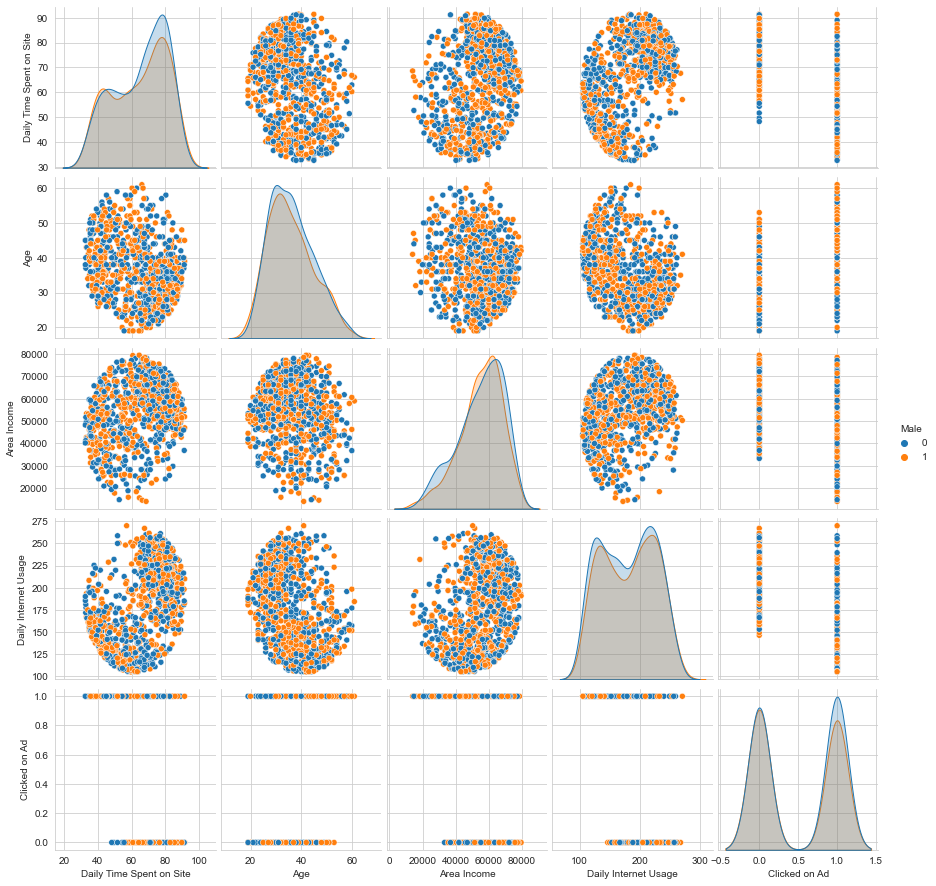

In [78]:
sns.pairplot(df,hue='Male');

> Correlation of all Features (Heatmap)

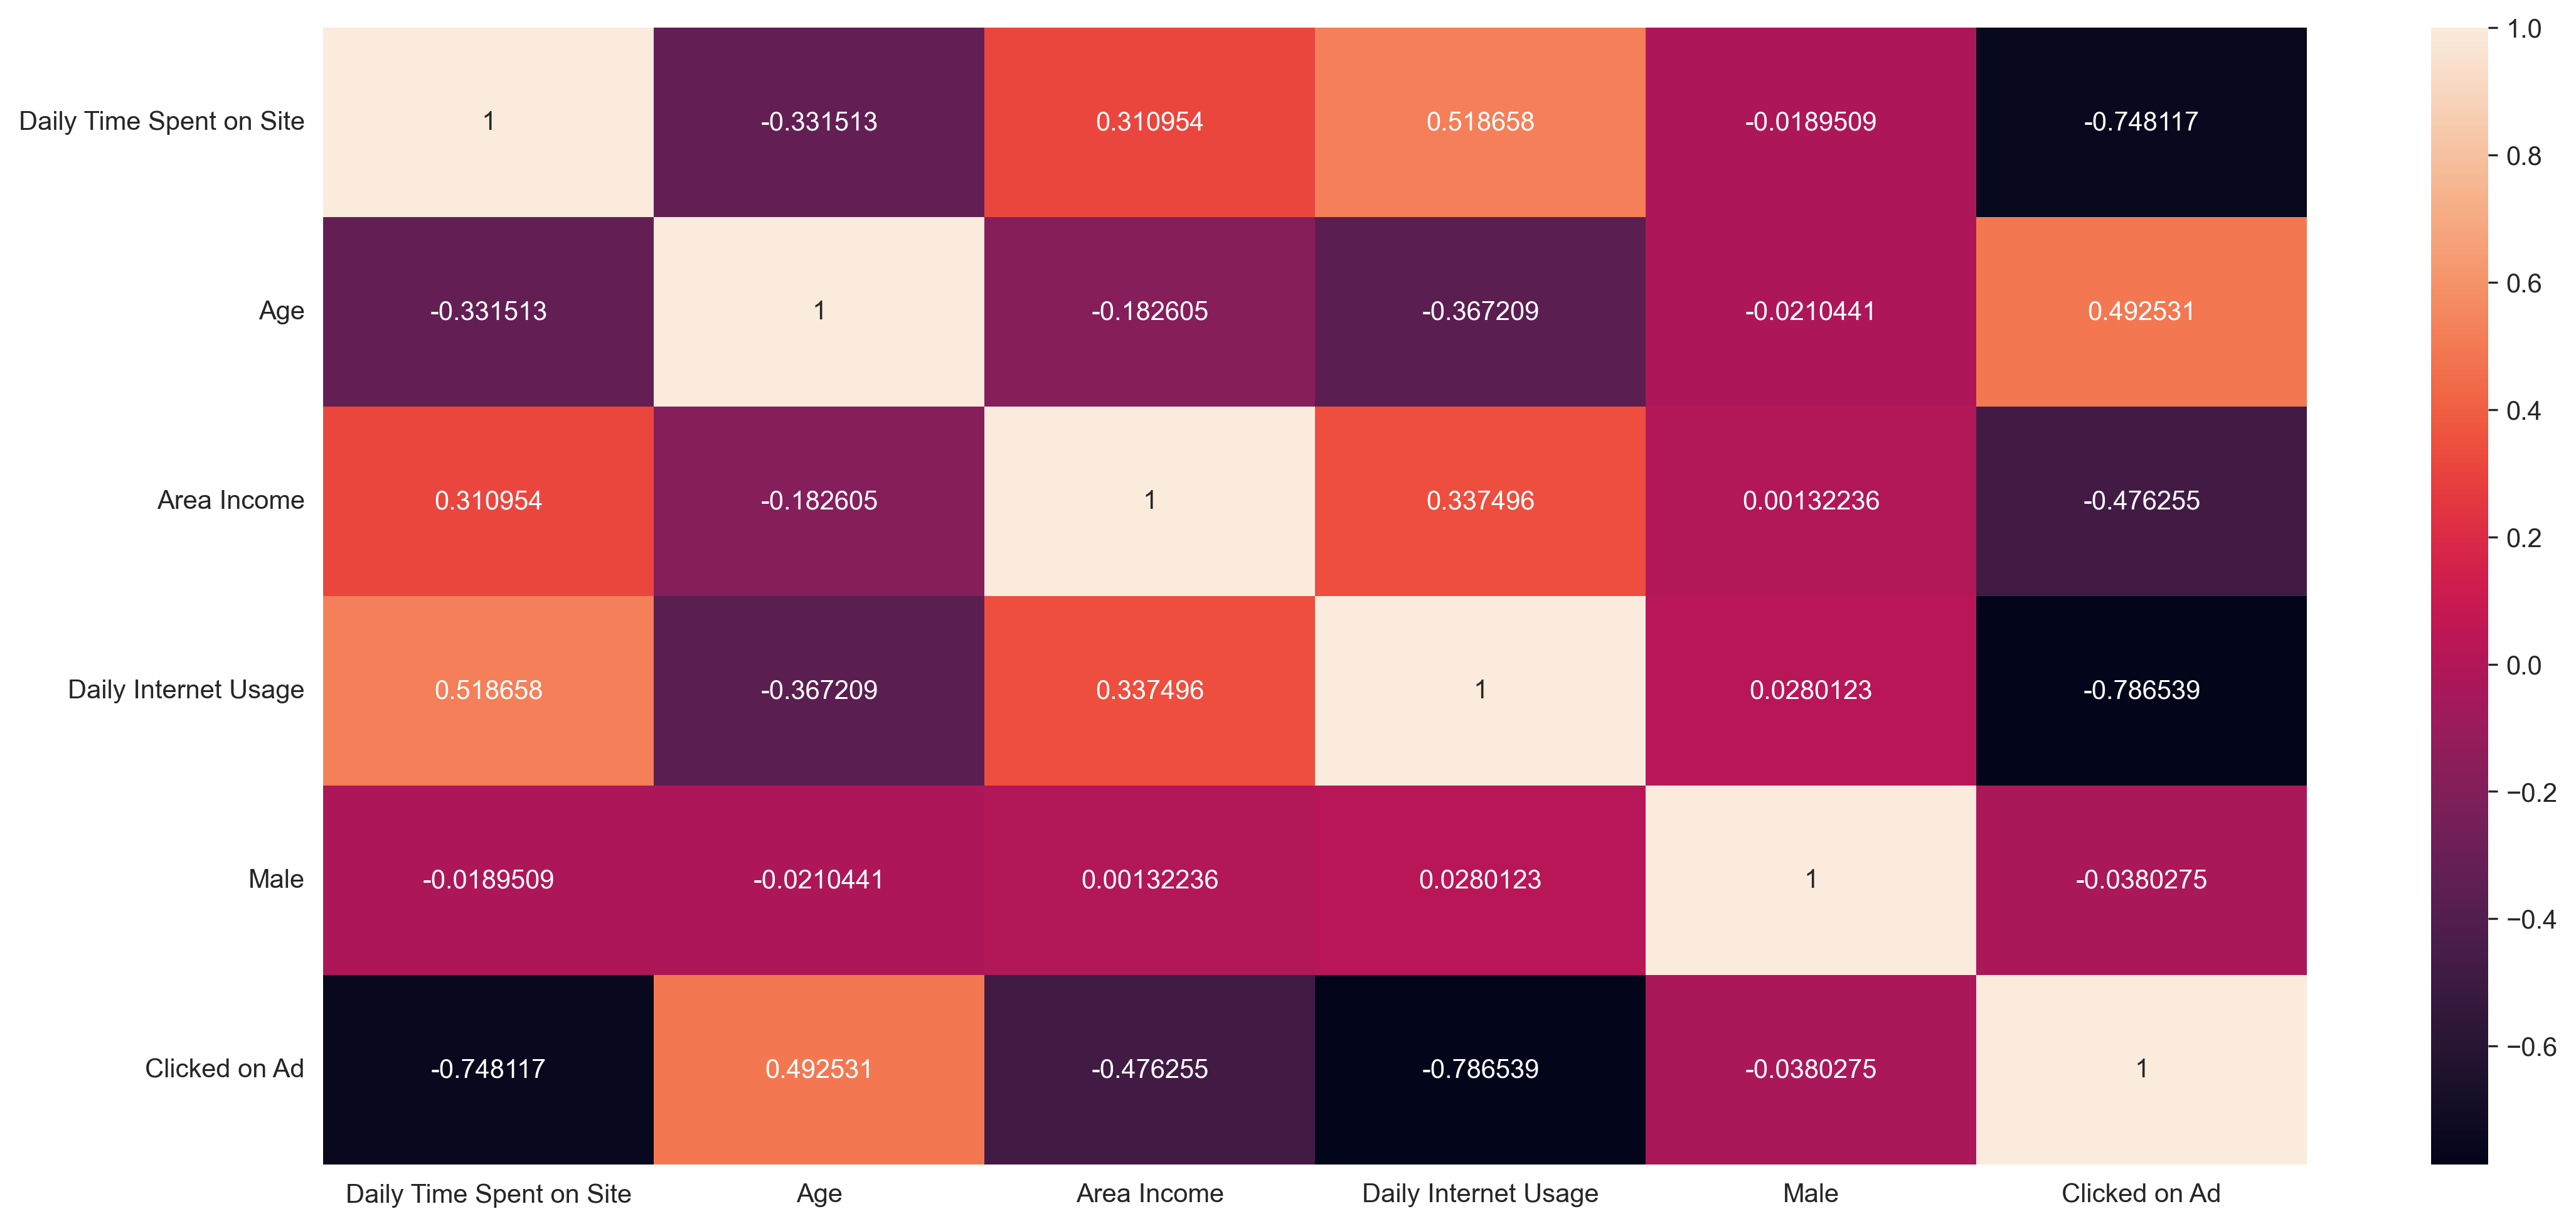

In [90]:
plt.figure(figsize=(17,8),dpi=300)
sns.heatmap(df.corr(),fmt='g',annot=True);

## Checking for the null values

> Heatmap to check null values

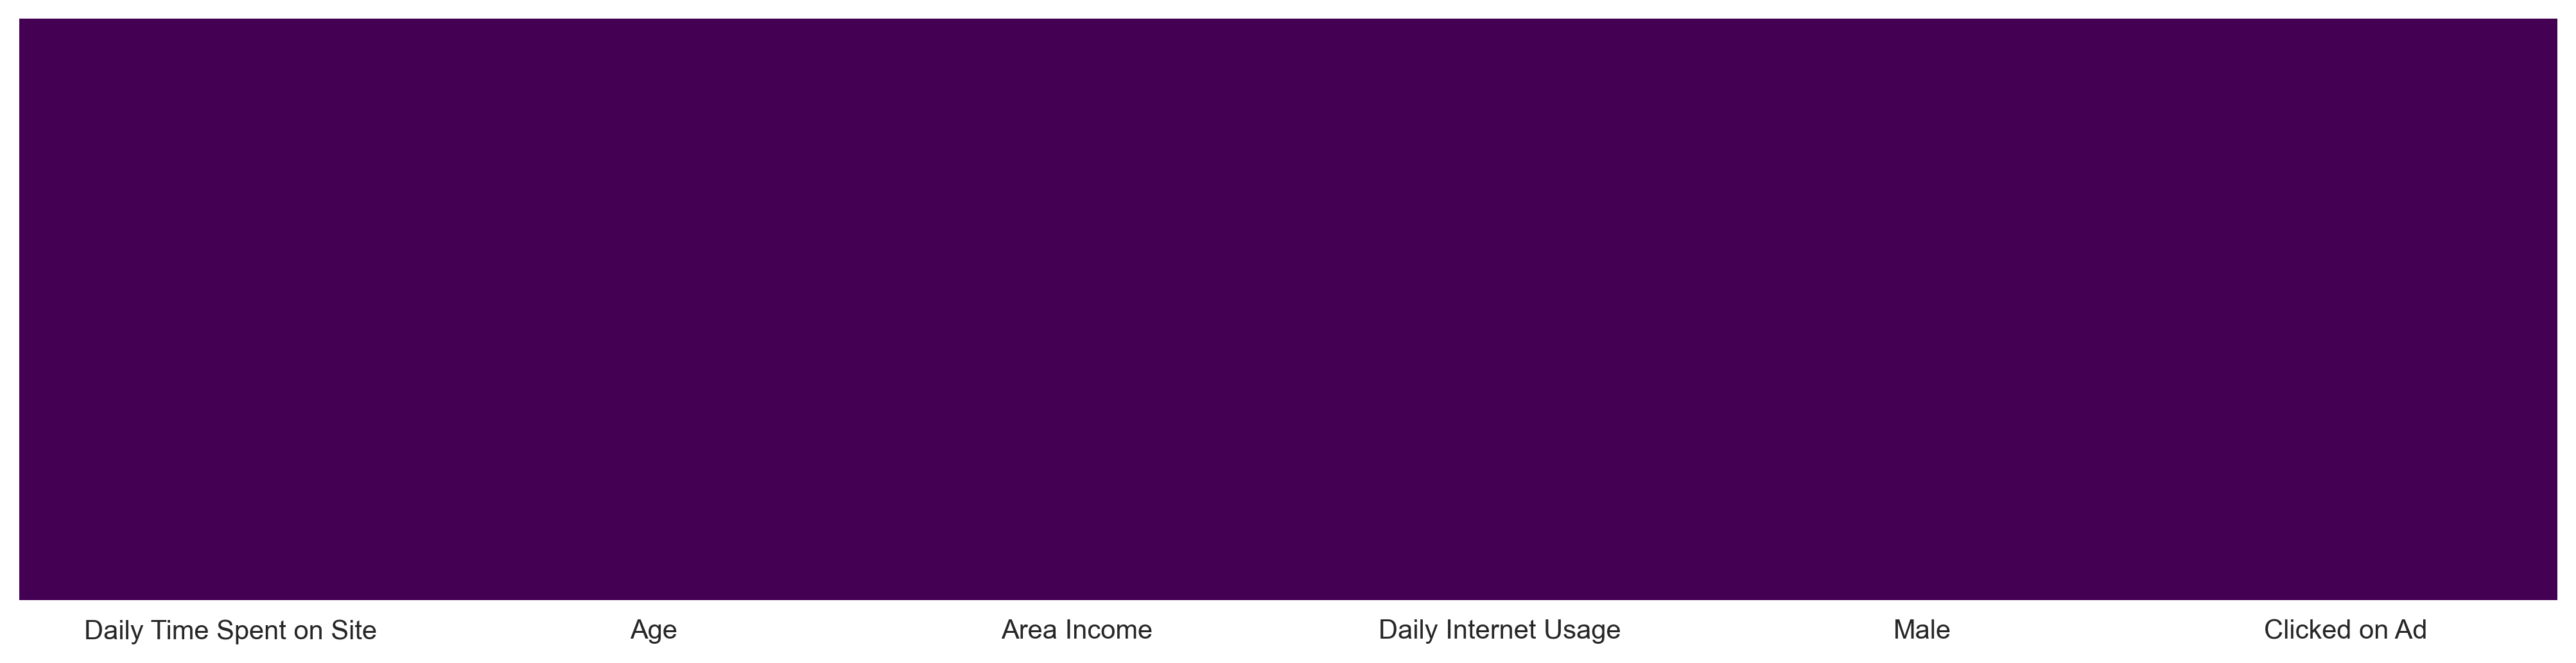

In [83]:
plt.figure(figsize=(17,4),dpi=300)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

## Adjusting the data 

In [5]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
df.drop((['Ad Topic Line','Country','Timestamp','City']),axis=1,inplace=True)

In [7]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


## Scaling the Data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()

In [10]:
scaler.fit(df.drop('Clicked on Ad',axis=1))

StandardScaler()

In [11]:
scaler_features=scaler.transform(df.drop('Clicked on Ad',axis=1))

In [12]:
df_fit=pd.DataFrame(scaler_features,columns=df.columns[:-1])

In [13]:
df_fit

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695
...,...,...,...,...,...
995,0.502963,-0.684305,1.222006,0.651314,1.038750
996,-0.864601,1.023896,0.953329,-1.038735,1.038750
997,-0.843775,1.707176,-0.938570,-1.358924,1.038750
998,-0.596389,-1.936986,-0.975484,0.181172,-0.962695


### 0 null values : ready to deal with the model 

## Train Test Split

In [14]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [15]:
X=df_fit
y=df['Clicked on Ad']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Creating the model

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Predictions & Evaluations

In [21]:
predictions= knn.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print("Acccuracy : ",accuracy_score(y_test,predictions)*100,'%')

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       146
           1       0.94      0.92      0.93       154

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



[[137   9]
 [ 12 142]]


Acccuracy :  93.0 %


## Finding the best k value for model 

In [24]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

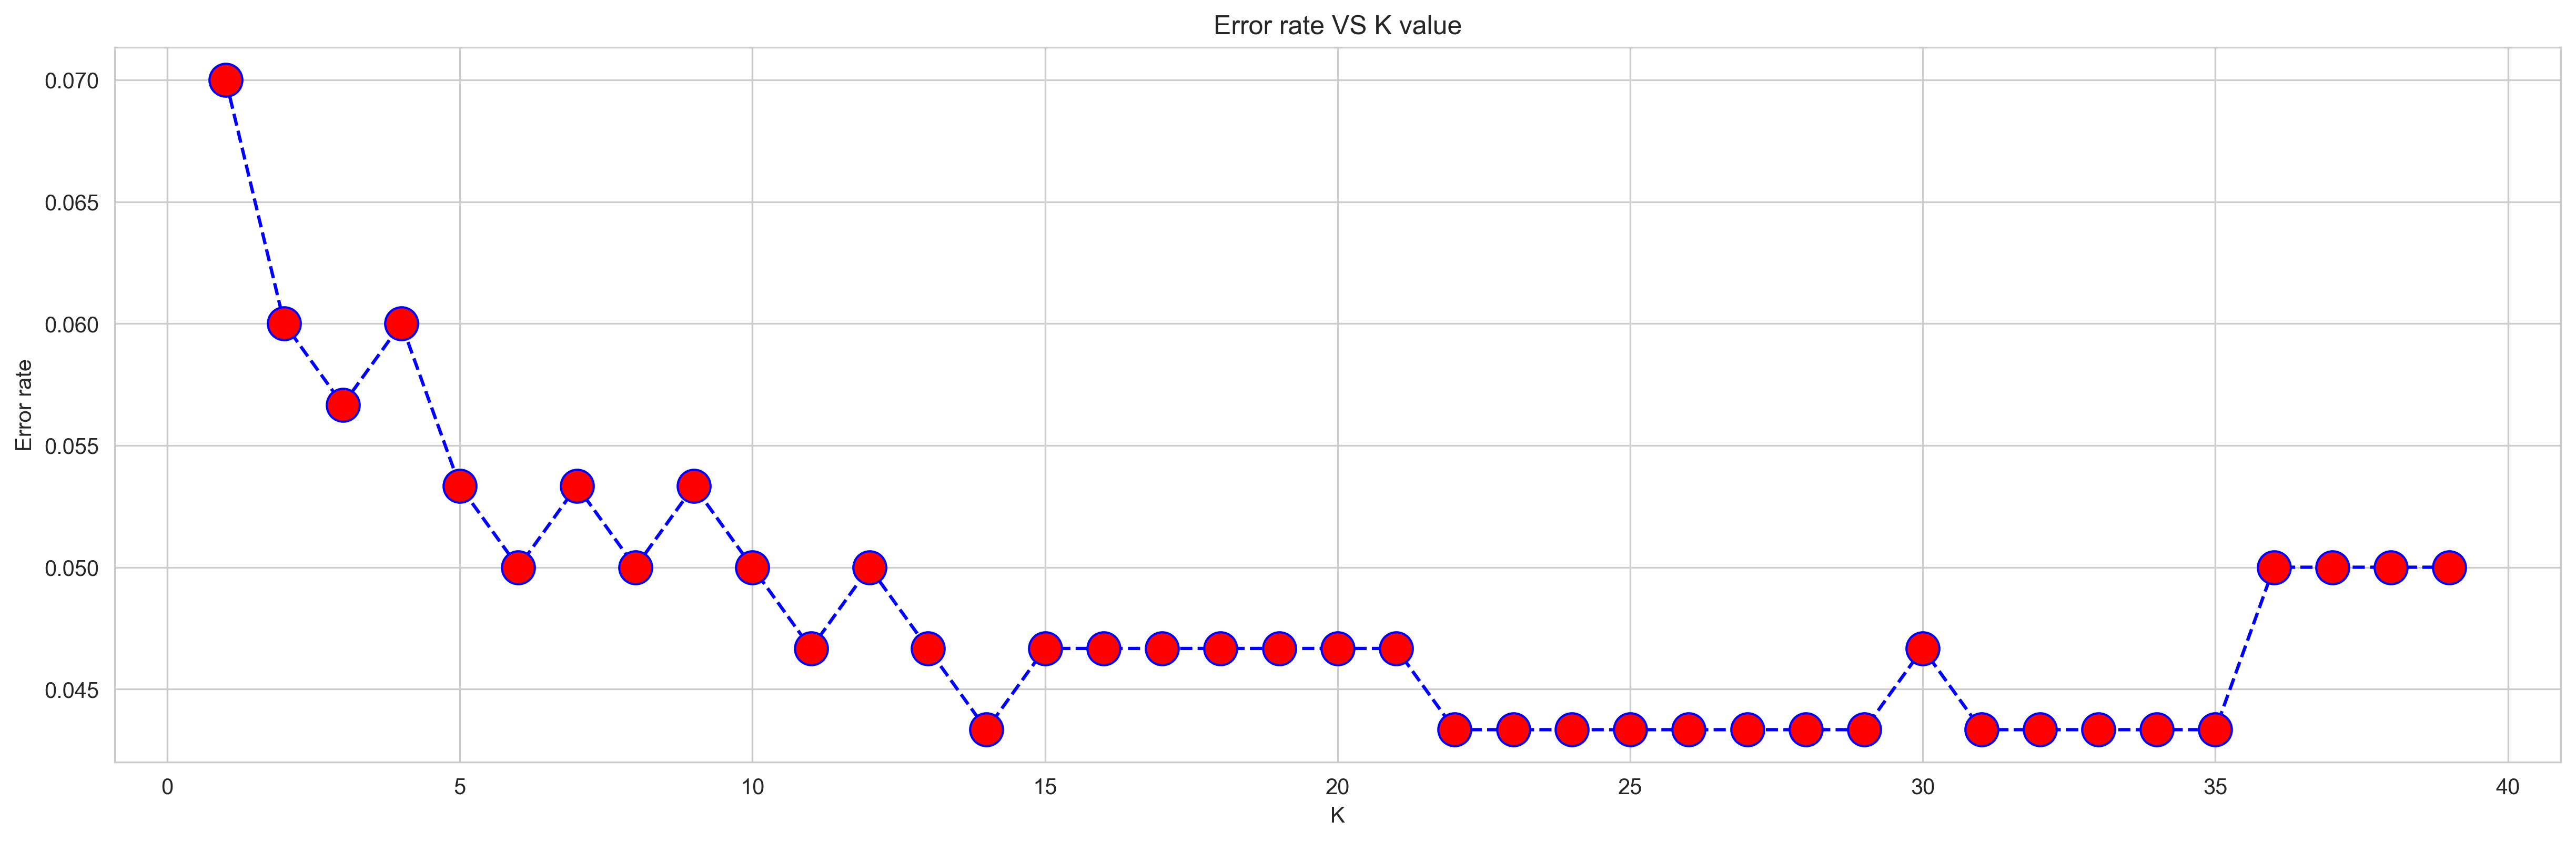

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,6),dpi=300)
plt.plot(range(1,40),error_rate,color='blue',marker='o',ls='dashed',markerfacecolor='red',markersize=15)
plt .title('Error rate VS K value')
plt.xlabel('K')
plt.ylabel('Error rate');

#### According to the plot k>20 gives maximum accuracy

> for k==24,31,etc. we can get the maximum accuracy.

## Training the model for k==31

In [28]:
knn=KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('Classfication report: \n\n',classification_report(y_test,pred))
print('\n')
print('Confusion matrix : \n\n',confusion_matrix(y_test,pred))
print('\n')
print('Accuracy :',accuracy_score(y_test,pred)*100,'%')

Classfication report: 

               precision    recall  f1-score   support

           0       0.92      0.99      0.96       146
           1       0.99      0.92      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



Confusion matrix : 

 [[145   1]
 [ 12 142]]


Accuracy : 95.66666666666667 %


## Testing the model 
### To test the model have to pass all the list of values require to train the X of model, but due to KNN we have to get values from user & have to scale them with dataset to get maximum accuracy through KNN model

> Taking values from user

In [ ]:
y_test

In [ ]:
df.head()

In [ ]:
Daily_Time_Spent_on_Site=float(input('Daily Time Spent on site :'))
Daily_Time_Spent_on_Site=float(input('Income :'))
Daily_Internet_Usage=float(input('Daily internet Usage :'))
Male=float(input('0=Female / 1=Male ?'))

In [ ]:
arr=[[Daily_Time_Spent_on_Site,Daily_Time_Spent_on_Site,Daily_Internet_Usage,Male]]

In [ ]:
scaler.fit(arr)

In [ ]:
scaler_features=scaler.transform(arr)

In [ ]:
scaler_features

In [ ]:
X_test

In [ ]:
df_user=pd.DataFrame(arr,columns=['Daily_Time_Spent_on_Site','Daily_Time_Spent_on_Site','Daily_Internet_Usage','Male'])

In [ ]:
df_user

In [ ]:
predictions=knn.predict(df_user)
if predictions[0]==0:
    print(em.emojize(':green_circle:'),"Employee is not going to leave the company.",em.emojize(':green_circle:'))
else:
    print(em.emojize(':prohibited:'),'Employee is going to leave the comapany',em.emojize(':prohibited:'))
    
    